# <span style="color:yellow">Personal Medical Insurance Cost with Regression Model</span>

## Libraries imports

#### Library imports for i/o

In [11]:
# working with structured data
import pandas as pd

# support for arrays, matrices, and mathematical functions to operate on data structures
import numpy as np

# manipulating file paths and directories
import os.path

#### Libraries for general purposes

In [56]:
# embedding HTML content like visualizations or interactive elements within a Jupyter notebook
from IPython.display import HTML

# generating random strings or for various string manipulation tasks
from string import ascii_letters

# generating random numbers within a specified range
from random import randint

#### Filtering warnings

In [93]:
import warnings
warnings.filterwarnings("ignore")

#### Matplotlib and Seaborn

##### Seaborn:
1. Seaborn is built on top of Matplotlib and provides a higher-level interface for creating attractive statistical graphics.
2. It simplifies the process of creating complex plots such as histograms, KDE plots, and regression plots by providing easy-to-use functions with sensible defaults.
3. Seaborn is particularly useful for exploring and visualizing relationships in complex datasets.
4. It is well-suited for statistical data analysis and exploratory data visualization.

##### Matplotlib:
1. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
2. It provides a MATLAB-like interface for creating plots and offers fine-grained control over plot customization.
3. Matplotlib is highly customizable and can create nearly any type of plot imaginable, although sometimes with more verbose syntax compared to other libraries.
4. It is a foundational library for data visualization in Python and is often used for creating publication-quality graphics and embedding plots in various applications.

In [116]:
# statistical data visualization
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats

# creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

##### Plotly Packages

1. Plotly is another library for creating interactive visualizations, with a focus on producing publication-quality graphics.
2. It supports a wide range of chart types and offers numerous customization options for fine-tuning plots.
3. Plotly also provides an online platform (Chart Studio) for sharing, collaborating on, and hosting Plotly graphs.
4. It is well-suited for creating interactive visualizations that can be easily shared and embedded in web applications, reports, and presentations.

In [6]:
# Python graphing library that makes interactive, publication-quality graphs online
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# work in offline mode with Jupyter notebooks
init_notebook_mode(connected=True)

#### Plot Library for flexible data visualization purposes

1. It provides a concise and powerful interface for creating a wide variety of plots, including interactive plots suitable for web applications and dashboards.
2. Bokeh emphasizes interactivity and can handle large datasets with ease.
3. It is well-suited for creating complex, interactive visualizations for web-based applications and dashboards.

In [90]:
# creating interactive and web-ready visualizations
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot

Loading BokehJS ...

#### Statistical Libraries

In [7]:
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

#### Data-preprocessing

In [60]:
# encoding categorical features
from sklearn.preprocessing import LabelEncoder

# 
from sklearn.preprocessing import StandardScaler

## Read the Dataset for health insurance

In [12]:
df_path ="D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//insurance.csv"

In [13]:
# is there such path?
print(os.path.exists(df_path))

True


In [126]:
# read the health insurance dataset
df = pd.read_csv(df_path)

## Exploratory Data Analysis (EDA)

### Data Shapes

In [15]:
print('columns count - ', len(df.columns), '\n')
print('columns: ', list(df.columns))

columns count -  7 

columns:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [21]:
print('Samples count: ', df.shape[0])

Samples count:  1338


In [19]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### Data Types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Descriptive Statistics

In [23]:
df.describe(include='O') # for categorical variables

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [24]:
df.describe(exclude='O') # for numerical variables

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check for missing value

In [26]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There is no missing value in the data :)

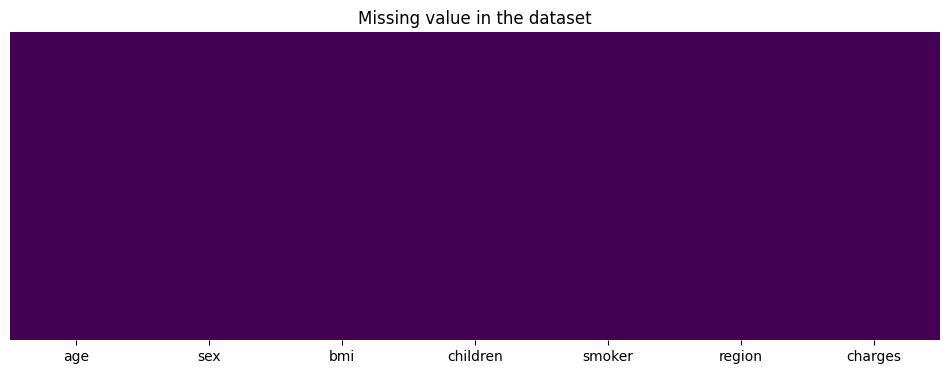

In [25]:
# no missing data visualisation
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

### Plots for data exploring

#### General mixed plots

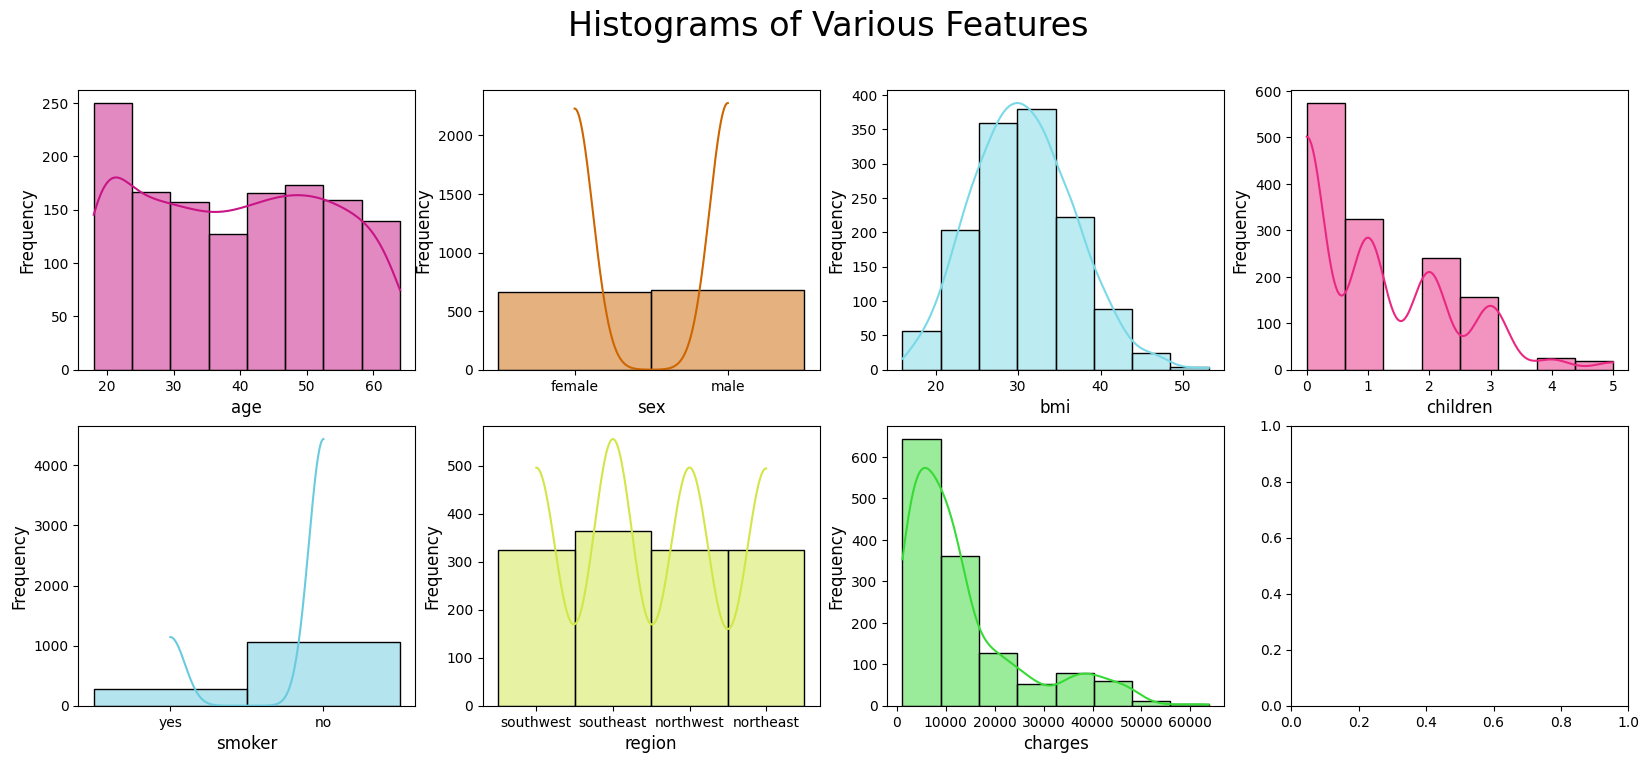

In [40]:
selected_cols = [col for col in df.columns if col]

colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 5 + 1
num_cols = min(4, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograms of Various Features", size=24)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(df[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)  # Set x-axis label font size
            axes[i, j].set_ylabel("Frequency", fontsize=12)  # Set y-axis label font size

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

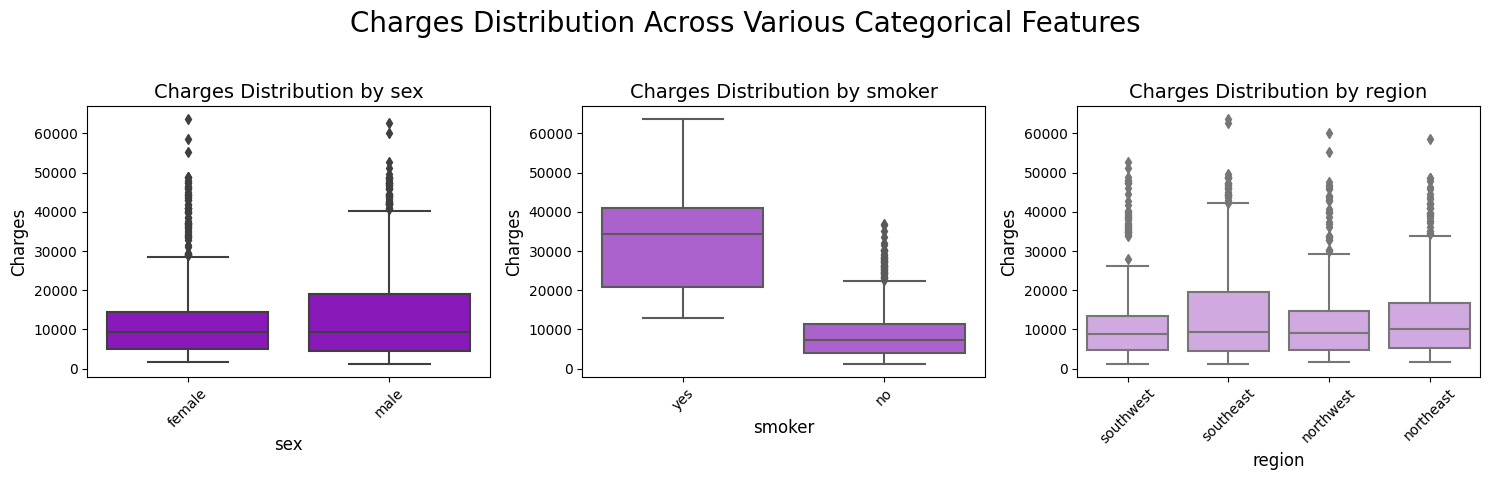

In [50]:
categorical_cols = df.select_dtypes(include=['object']).columns

selected_cols = [col for col in categorical_cols]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Charges Distribution Across Various Categorical Features", size=20)

colors = sns.light_palette('darkviolet', n_colors=len(selected_cols)+1, reverse=True)

for idx, col in enumerate(selected_cols):
    row = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[idx] if num_rows == 1 else axes[row, col_idx]
    sns.boxplot(x=col, y='charges', data=df, ax=ax, palette=[colors[idx]])
    ax.set_title(f'Charges Distribution by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Charges", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

for ax in axes.flat[num_subplots:]:
    ax.remove()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

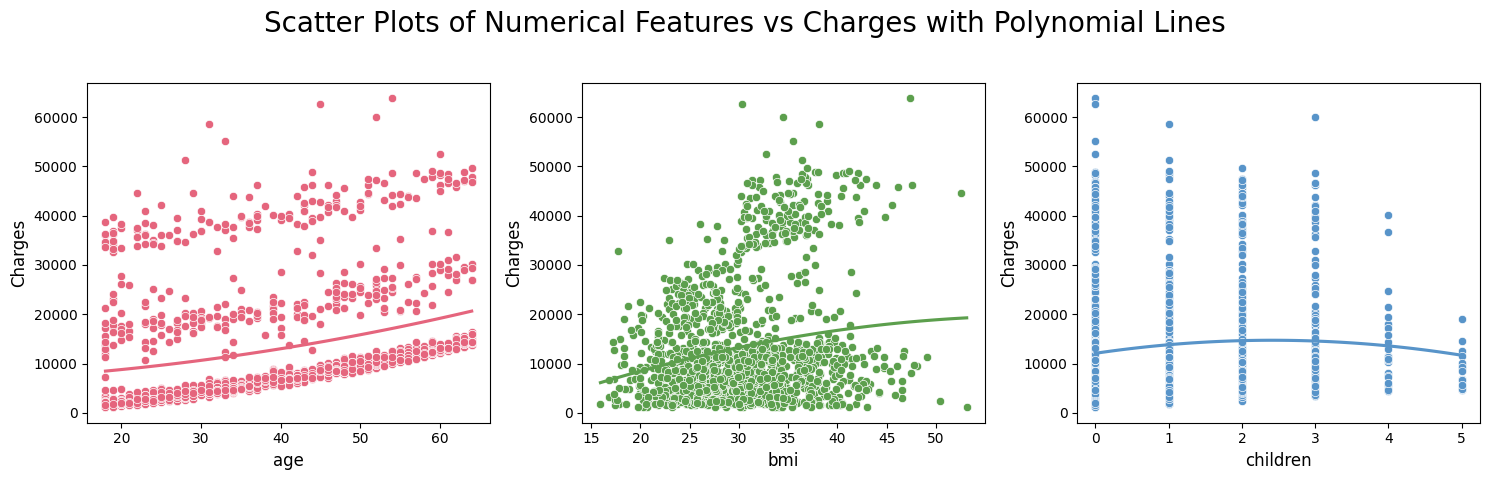

In [54]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

selected_cols = [col for col in numerical_cols if col != 'charges']

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Scatter Plots of Numerical Features vs Charges with Polynomial Lines", size=20)

palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)

for idx, col in enumerate(selected_cols):
    if num_rows == 1 or num_cols == 1:
        ax = axes[idx]
    else:
        row = idx // num_cols
        col_idx = idx % num_cols
        ax = axes[row, col_idx]
        
    sns.scatterplot(x=col, y='charges', data=df, ax=ax, color=palette[idx])
    sns.regplot(x=col, y='charges', data=df, ax=ax, scatter=False, order=2, color=palette[idx], ci=None)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Charges", fontsize=12)

for ax in axes.flat[num_subplots:]:
    ax.remove()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Distribution for smokers

Smoking patients spend more on treatment.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

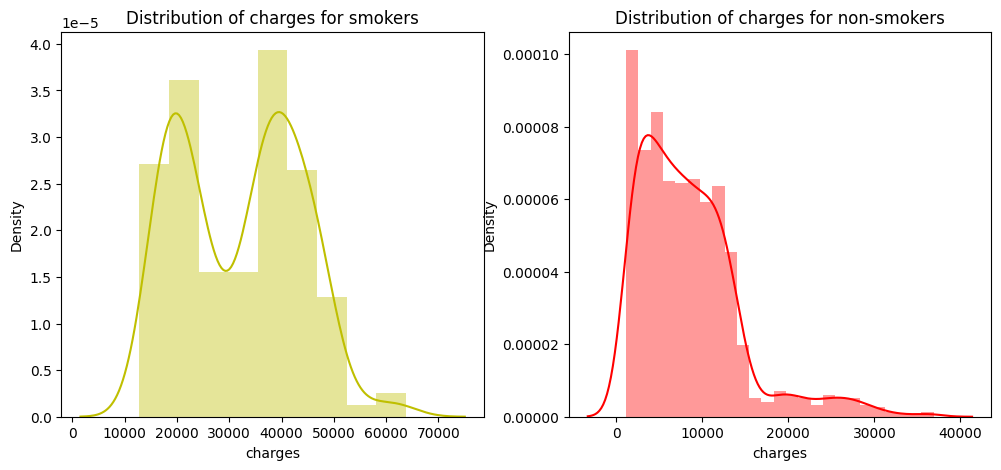

In [114]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='y',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='r',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

##### Exploring dependencies of gender distribution

Please note that women are coded with the symbol "0" and men - "1". Thus non-smoking people and the truth more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking.

Text(0.5, 1.0, 'Smokers distribution by gender')

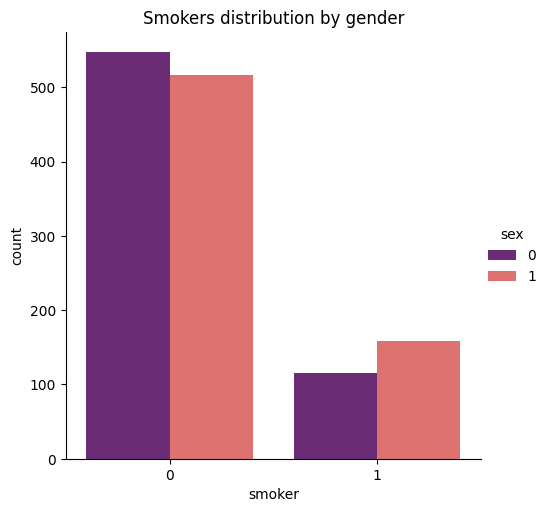

In [112]:
sns.catplot(x="smoker", kind="count", hue = 'sex', palette="magma", data=df)
plt.title("Smokers distribution by gender")
# plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])

([<matplotlib.axis.YTick at 0x1c0e102e7d0>,
 [Text(0, 0, 'Non-Smoker'), Text(0, 1, 'Smoker')])

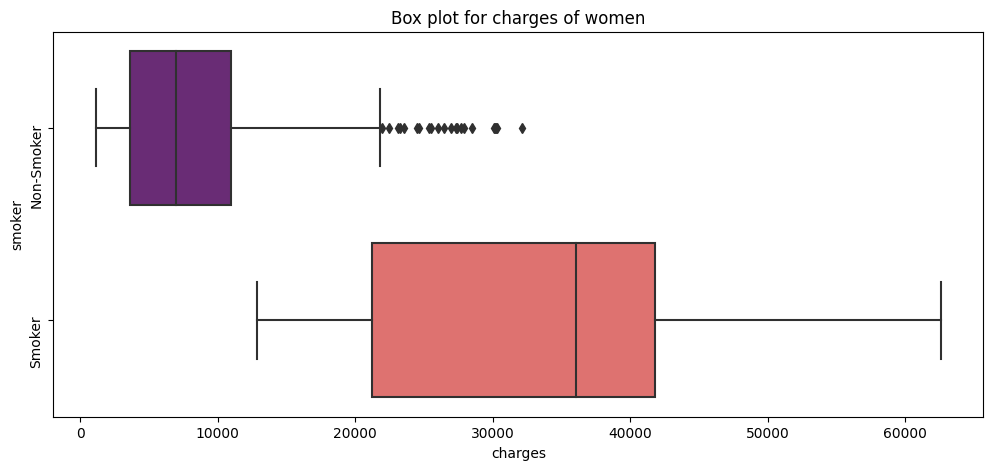

In [107]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')
# adding annotations to clarify y-axis labels
plt.yticks([0, 1], ['Non-Smoker', 'Smoker'], rotation = 90)

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

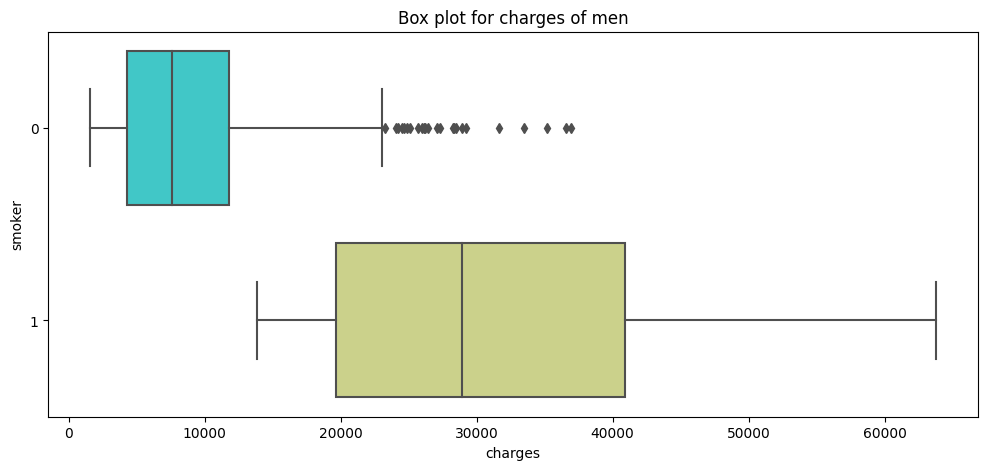

In [115]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

##### Correlation plot without categorical variables

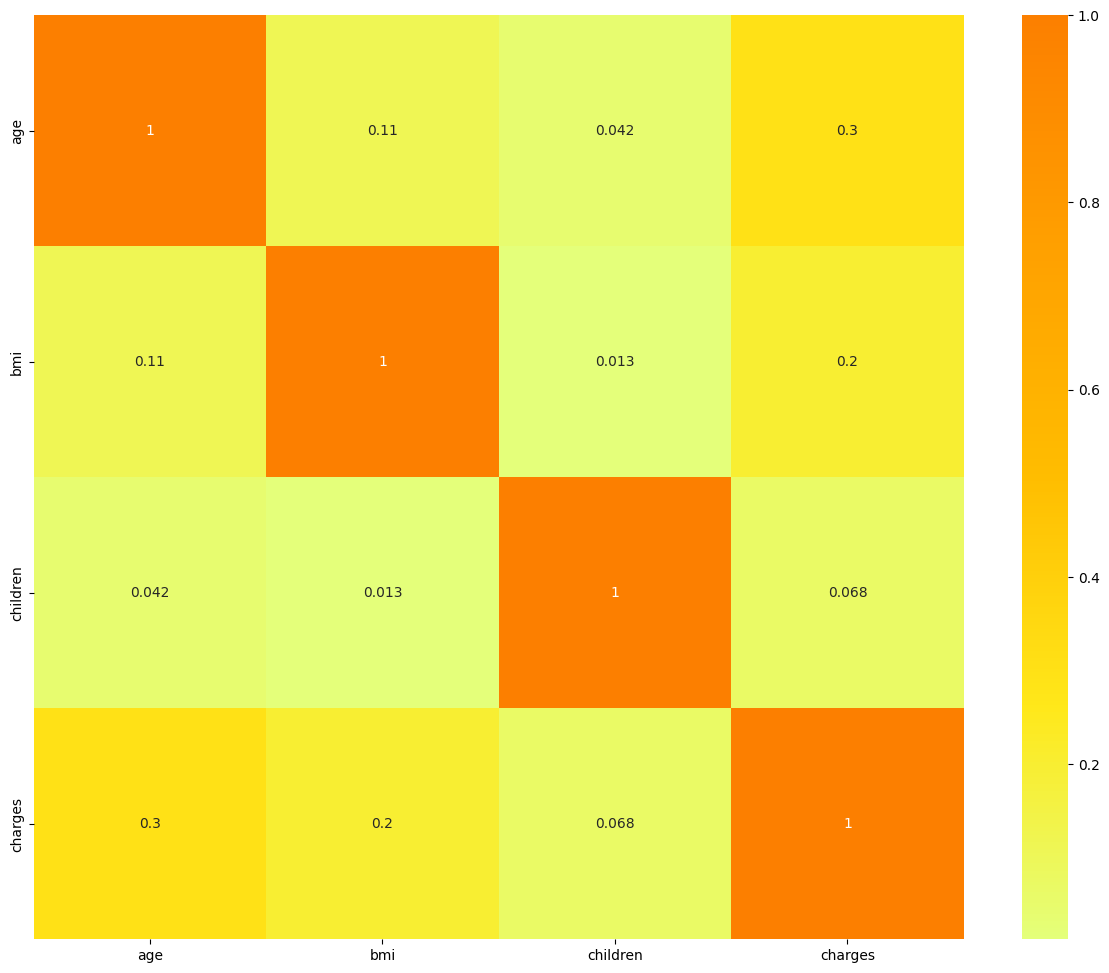

In [59]:
# features for matrix
col_for_corr = ['age', 'bmi', 'children', 'charges']

# correlation matrix calculation
corr = df[col_for_corr].corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

## Feature engineering

### Encoding categorical features

In [127]:
# sex feature
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

In [128]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'female': 0, 'male': 1}


In [63]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [129]:
# smoker or not feature
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

In [130]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'no': 0, 'yes': 1}


In [65]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


##### A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. But in this case, nothing will change, because there is no special order in which the regions would be listed

In [131]:
# region feature
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [132]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [82]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


##### Correlation plot with encoded categorical variables

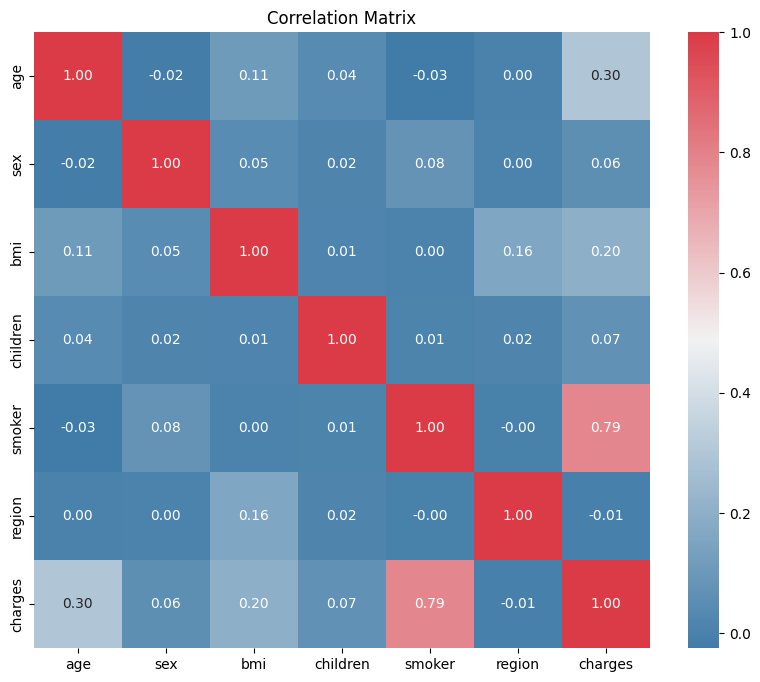

In [88]:
# create a subplot with specified figure size
f, ax = plt.subplots(figsize=(10, 8))

corr = df.corr()

# Create a heatmap of the correlation matrix
# Set the mask to hide the upper triangle of the heatmap
# Set the color map using seaborn's diverging_palette
# Add annotations to display correlation values in each cell
# Format annotations to two decimal places
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".2f")

ax.set_title('Correlation Matrix')
plt.show()

### Outlier Engineering

In [117]:
# function to create histogram, Q-Q plot and

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, color='skyblue')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.gca().get_lines()[0].set_color('darkviolet')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color='salmon')
    plt.title('Boxplot')

    plt.show()

In [118]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

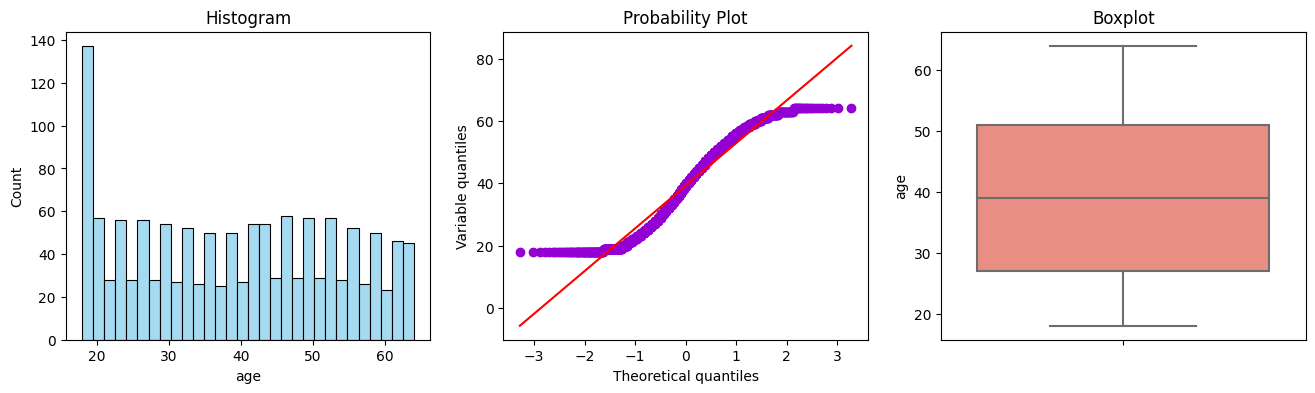

In [119]:
# let's find outliers in age
diagnostic_plots(df, 'age')

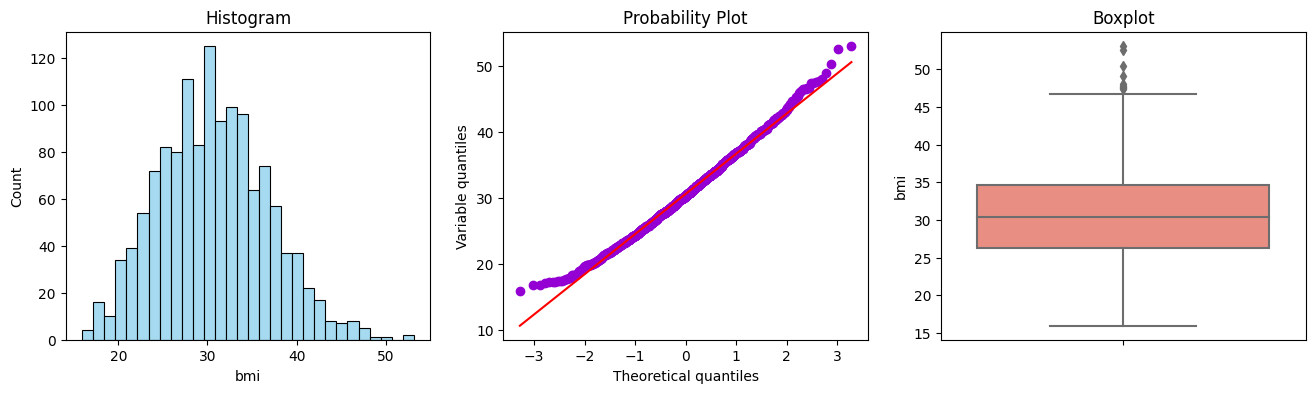

In [121]:
# let's find outliers in bmi
diagnostic_plots(df, 'bmi')

BMI (Body Mass Index) can definitely be greater than 50. BMI is a measure of body fat based on a person's weight and height, calculated by dividing weight in kilograms by height in meters squared. It's a useful tool for assessing whether someone is underweight, normal weight, overweight, or obese.

A BMI of 50 or above would indicate extreme obesity (Obese Class III). While less common, it's certainly possible for individuals to have BMIs in this range, especially in cases of severe obesity. However, it's important to note that BMI is just one indicator of health and doesn't account for factors like muscle mass, bone density, or distribution of fat, so it's not always a perfect measure of an individual's health status.

In [137]:
bmi_gt_50 = df[df['bmi'] > 50][['bmi', 'sex', 'charges', 'smoker']]
print(bmi_gt_50)

        bmi  sex     charges  smoker
847   50.38    1   2438.0552       0
1047  52.58    1  44501.3982       1
1317  53.13    1   1163.4627       0


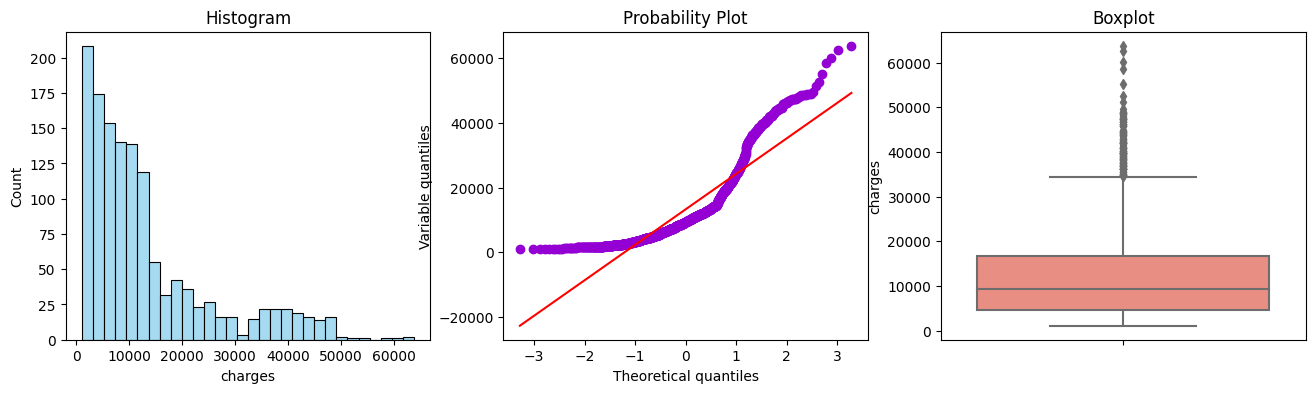

In [139]:
# let's find outliers in charges
diagnostic_plots(df, 'charges')

Charges are greater than 35000 for smokers.

In [151]:
charges_gt_50000 = df[(df['charges'] > 35000) & (df['smoker'] == 1)][['bmi', 'sex', 'charges', 'smoker']]
print(charges_gt_50000)

         bmi  sex      charges  smoker
14    42.130    1  39611.75770       1
19    35.300    1  36837.46700       1
23    31.920    0  37701.87680       1
29    36.300    1  38711.00000       1
30    35.600    1  35585.57600       1
...      ...  ...          ...     ...
1300  30.360    1  62592.87309       1
1301  30.875    1  46718.16325       1
1303  27.800    1  37829.72420       1
1313  34.700    0  36397.57600       1
1323  40.370    0  43896.37630       1

[130 rows x 4 columns]


In [152]:
charges_gt_50000 = df[(df['charges'] > 35000)][['bmi', 'sex', 'charges', 'smoker']]
print(charges_gt_50000)

         bmi  sex      charges  smoker
14    42.130    1  39611.75770       1
19    35.300    1  36837.46700       1
23    31.920    0  37701.87680       1
29    36.300    1  38711.00000       1
30    35.600    1  35585.57600       1
...      ...  ...          ...     ...
1300  30.360    1  62592.87309       1
1301  30.875    1  46718.16325       1
1303  27.800    1  37829.72420       1
1313  34.700    0  36397.57600       1
1323  40.370    0  43896.37630       1

[133 rows x 4 columns]
